In [1]:
from collections import OrderedDict
import numpy as np
import cv2
import argparse
import dlib
import imutils
import matplotlib.pyplot as plt

In [2]:
# define a dictionary that maps the indexes of the facial
# landmarks to specific face regions
FACIAL_LANDMARKS_INDEXES = OrderedDict([
    ("Mouth", (48, 68)),
    ("Right_Eyebrow", (17, 22)),
    ("Left_Eyebrow", (22, 27)),
    ("Right_Eye", (36, 42)),
    ("Left_Eye", (42, 48)),
    ("Nose", (27, 35)),
    ("Jaw", (0, 17))
])

def shape_to_numpy_array(shape, dtype="int"):
    
    # initialize the list of (x, y)-coordinates
    coordinates = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coordinates[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coordinates


def visualize_facial_landmarks(image, shape, colors=None, alpha=0.75):

    facial_features_cordinates = {}
    # create two copies of the input image -- one for the
    # overlay and one for the final output image
    overlay = image.copy()
    output = image.copy() 

    # if the colors list is None, initialize it with a unique
    # color for each facial landmark region
    if colors is None:
        colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),
                  (168, 100, 168), (158, 163, 32),
                  (163, 38, 32), (180, 42, 220)]
        
    # loop over the facial landmark regions individually
    
    for (i, name) in enumerate(FACIAL_LANDMARKS_INDEXES.keys()):
        
        # grab the (x, y)-coordinates associated with the
        # face landmark     
        (j, k) = FACIAL_LANDMARKS_INDEXES[name]
        
        pts = shape[j:k]
        facial_features_cordinates[name] = pts
        
        # check if are supposed to draw the jawline
        
        if name == "Jaw":
            
            # since the jawline is a non-enclosed facial region,
            # just draw lines between the (x, y)-coordinates
            
            for l in range(1, len(pts)):
                ptA = tuple(pts[l - 1])
                ptB = tuple(pts[l])
                cv2.line(overlay, ptA, ptB, colors[i], 2)

        # otherwise, compute the convex hull of the facial
        # landmark coordinates points and display it
        else:
            hull = cv2.convexHull(pts)
            cv2.drawContours(overlay, [hull], -1, colors[i], -1)

    # apply the transparent overlay
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

    # return the output image
    print(facial_features_cordinates)
    return output, facial_features_cordinates



def get_facial_landmark(predictor_path, img_path):
    # initialize dlib's face detector (HOG-based) and then create
    # the facial landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(predictor_path)

    # load the input image, resize it, and convert it to grayscale
    image = cv2.imread(img_path)

    #image = imutils.resize(image, width=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



    # detect faces in the grayscale image
    rects = detector(gray, 1)

    # loop over the face detections
    for (i, rect) in enumerate(rects):

        # determine the facial landmarks for the face region, then
        # convert the landmark (x, y)-coordinates to a NumPy array
        shape = predictor(gray, rect)
        shape = shape_to_numpy_array(shape)

        output, facial_land = visualize_facial_landmarks(image, shape)
    while True :
        cv2.imshow('result', output)

        key = cv2.waitKey(0)
        cv2.destroyAllWindows()

        if key == 27 :
            break
    return output, facial_land

In [3]:
predictor_path = "./shape_predictor.dat"
faces_folder_path = "./calib/WIN_20190928_17_28_59_Pro.jpg"

In [4]:
out, facial_land = get_facial_landmark(predictor_path=predictor_path, img_path=faces_folder_path)

{'Mouth': array([[580, 484],
       [598, 474],
       [615, 468],
       [628, 472],
       [641, 469],
       [660, 476],
       [681, 486],
       [661, 500],
       [641, 506],
       [627, 507],
       [614, 505],
       [597, 498],
       [588, 484],
       [615, 484],
       [628, 486],
       [641, 485],
       [671, 486],
       [641, 486],
       [628, 488],
       [615, 486]]), 'Right_Eyebrow': array([[522, 306],
       [538, 288],
       [562, 281],
       [588, 284],
       [611, 294]]), 'Left_Eyebrow': array([[657, 294],
       [683, 285],
       [712, 285],
       [739, 296],
       [756, 317]]), 'Right_Eye': array([[546, 339],
       [561, 333],
       [578, 334],
       [597, 342],
       [578, 345],
       [560, 345]]), 'Left_Eye': array([[675, 344],
       [692, 336],
       [710, 337],
       [729, 342],
       [711, 349],
       [692, 348]]), 'Nose': array([[633, 331],
       [631, 358],
       [629, 383],
       [627, 410],
       [601, 431],
       [614, 434],
  

In [5]:
a = facial_land['Left_Eye'].reshape(12)
b = facial_land['Right_Eye'].reshape(12)

In [6]:
t =np.array([b,a])

In [7]:
t = t.reshape(24)

In [29]:
temp = t
img = cv2.imread(faces_folder_path, 0)
#for i in range(0, len(temp), 2):
i = 10
img = cv2.line(img,(temp[i],temp[i+1]),(temp[i],temp[i +1]),(255,0,0),5)

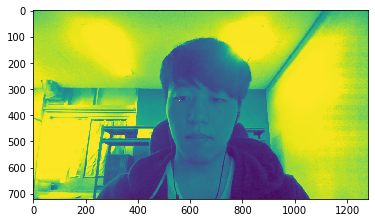

In [30]:
plt.imshow(img)

In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
from functools import partial
import cv2 
from glob import glob
import matplotlib.pyplot as plt
import scipy.io as io

In [12]:
def get_width(arr, direction): # dlib's eye 6 point landamrk 
    if direction == 0:  # left
        width_top = [(arr[2] + arr[4]) // 2, (arr[3] + arr[5]) // 2]
        width_bottom = [(arr[8] + arr[10]) // 2, (arr[9] + arr[11]) // 2]
    if direction == 1: # right 
        width_top = [(arr[14] + arr[16]) // 2, (arr[15] + arr[17]) // 2]
        width_bottom = [(arr[20] + arr[22]) // 2, (arr[21] + arr[23]) // 2]
    return width_top, width_bottom

def get_height(arr, direction):
    if direction == 0:  # left
        height_left = [arr[0], arr[1]]
        height_right = [arr[6], arr[7]]
    if direction == 1: # right 
        height_left = [arr[12], arr[13]]
        height_right = [arr[18], arr[19]]
    return height_left, height_right

def draw_dot(img_path, arr):
    image = cv2.imread(img_path)
    image_dot = cv2.line(image,(arr[0],arr[1]),(arr[0],arr[1]),(255,0,0),5)
    plt.imshow(image_dot)

In [14]:
def add(array,mod, num = 15):
    arr = array.copy()
    if mod == 0: #left
        arr[0] -= num
    elif mod == 1: #right
        arr[0] += num
    elif mod == 2: # top
        arr[1] -= num
    elif mod == 3: # bottom
        arr[1] += num
    return arr

In [15]:
def Normalize(arr,img_path, output_w = 60, output_h = 36):
    mod_left = add(arr[0], 0)
    mod_right = add(arr[1], 1)
    mod_top = add(arr[2], 2)
    mod_bottom = add(arr[3], 3)
    
    rect_left_top = [mod_left[0], mod_top[1]]
    rect_right_top = [mod_right[0], mod_top[1]]
    rect_left_bottom = [mod_left[0], mod_bottom[1]]
    rect_right_bottom = [mod_right[0], mod_bottom[1]]
    
    img = cv2.imread(img_path)
    h, w, c = img.shape
    
    dstPoint=np.array([rect_left_top, rect_right_top, rect_right_bottom,
                   rect_left_bottom], dtype=np.float32)
    srcPoint=np.array([[0, 0], [w, 0], [w, h], [0, h]], dtype=np.float32)
    matrix = cv2.getPerspectiveTransform(dstPoint, srcPoint)
    
    dst = cv2.warpPerspective(img, matrix, (w, h))
    resized_dst = cv2.resize(dst, (output_w, output_h), interpolation=cv2.INTER_AREA )
    return resized_dst

In [21]:
top, bottom = get_width(t, 1)  # 0 -> left, 1 -> right
left, right = get_height(t, 1) 

In [22]:
array = [left, right, top, bottom]  # Integrate value for making function's input
dst = Normalize(array, faces_folder_path) 

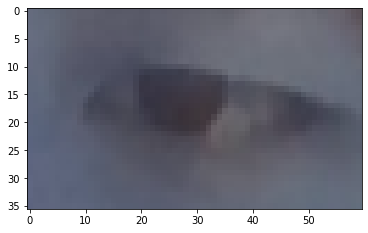

In [23]:
plt.imshow(dst)